In [1]:
# Load required packages

from __future__ import print_function, division
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
import scipy
from statistics import mean

In [2]:
# Load pickled data

dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [39]:
# Wavelength, Flux and Uncertainty arrays for supernova 'sn2004gq'.

wvl = dataset15["sn2004gq"].wavelengths
y_11hs = dataset15["sn2004gq"].data
flux = y_11hs.astype('float64')
uncer = dataset15["sn2004gq"].smooth_uncertainty['Ph15.8']

In [40]:
# Function that throws away unused data points in the new bins.

N = 20
nw = len(wvl)
nbins = float(nw)/N
rembin = int(nbins)
rembin2 = rembin*N
unpairedbins = nw - rembin2
def evenodd(nbin):
    if float(nbins).is_integer():
        k = (0, 0)
    else:
        if (unpairedbins % 2) == 0:
            k = (int(unpairedbins/2), int(unpairedbins/2))
        else:
            k = (int(unpairedbins/2), int(unpairedbins/2+1))
    return k
unpaired = evenodd(nbins)
l = unpaired[0]
m = unpaired[1]

In [41]:
# Function that reduces the resolution of a given spectrum by an integer N. It takes 
# wavelength, flux and uncertainty arrays as input and gives back the new wavelength, flux and uncertainty arrays
# of the reduced resolution spectrum.

def binspectra(wvl, flux, uncer, N):
    looparray = range(0 + l, len(wvl) - m, N)
    
    wnew = np.array([wvl[i:i + N].sum() / N for i in looparray])
    
    fnew = np.array([flux[i:i + N].sum() for i in looparray])
    
    uncernew = np.array([np.sqrt(np.sum(np.square(uncer[i:i + N]))) for i in looparray])
 
    return wnew, fnew, uncernew

In [ ]:
# fitting in a single function. The final function takes wavelength, flux and uncertainty arrays as input 
# and gives back the new wavelength, flux and uncertainty arrays of the reduced resolution spectrum.
def binspectra(wvl, flux, uncer, N):
    nw = len(wvl)
    nbins = float(nw)/N
    rembin = int(nbins)
    rembin2 = rembin*N
    unpairedbins = nw - rembin2
    if float(nbins).is_integer():
        k = (0, 0)
    else:
        if (unpairedbins % 2) == 0:
            k = (int(unpairedbins/2), int(unpairedbins/2))
        else:
            k = (int(unpairedbins/2), int(unpairedbins/2+1))
    l = k[0]
    m = k[1]
    wnew = np.array([wvl[i:i+N].sum()/N for i in range(0+l,len(wvl)-m,N)])
    fnew = np.array([flux[i:i+N].sum() for i in range(0+l,len(wvl)-m,N)])
    uncernew = np.array([np.sqrt(np.sum(np.square(uncer[i:i+N]))) for i in range(0+l,len(wvl)-m,N)])
    return wnew, fnew, uncernew

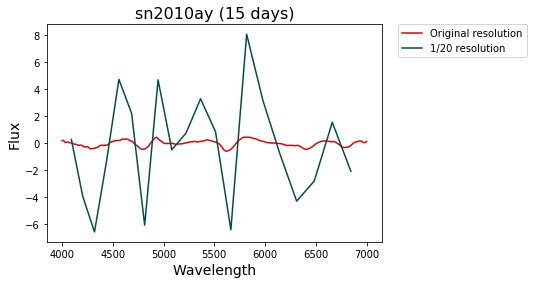

In [42]:
# An example, here we decrease the resolution of the spectrum of supernova "x" by factor of N 
# and plot the two spectra without the uncerainty arrays.


newspectra10 = binspectra(wvl, flux, uncer, N)
plt.plot(wvl, flux, c='xkcd:red', label="Original resolution")
plt.plot(newspectra10[0], newspectra10[1], c='xkcd:dark teal', label="1/20 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('sn2010ay (15 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

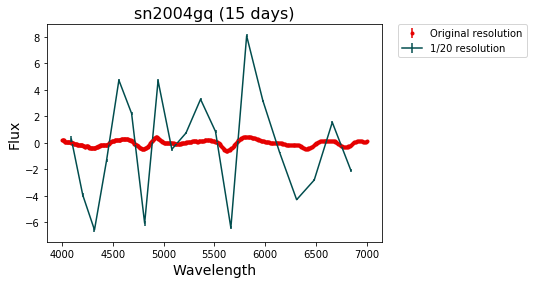

In [43]:
# Spectrum of "X" with the uncertainty.

plt.errorbar(wvl, flux, c='xkcd:red',yerr=uncer, xerr=None,
             fmt='.', ecolor=None, elinewidth=None, capsize=None, 
             barsabove=True, lolims=False, uplims=False, xlolims=False, 
             xuplims=False, errorevery=1, capthick=None, data=None, label="Original resolution")
plt.errorbar(newspectra10[0], newspectra10[1], c='xkcd:dark teal',yerr=newspectra10[2], 
             xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=True, 
             lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, 
             data=None, label="1/20 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('sn2004gq (15 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.xlim(4550, 5000)
#plt.ylim(-0.1, 0.1)
plt.show()

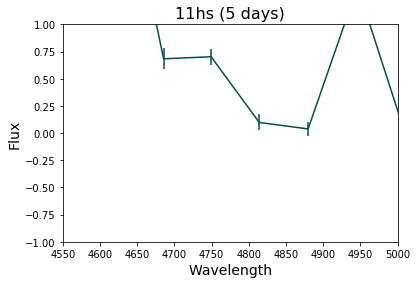

In [9]:
# Spectrum of "X" reduced by factor of N with the uncertainty.

newspectra10 = binspectra(wvl, flux, uncer, N)
x = newspectra10[0]
y = newspectra10[1]
yer = newspectra10[2]
plt.errorbar(x, y, c='xkcd:dark teal',yerr=yer, xerr=None, fmt='', ecolor=None, 
             elinewidth=None, capsize=None, barsabove=True, lolims=False, uplims=False, 
             xlolims=False, xuplims=False, errorevery=1, capthick=None, data=None)
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(4550, 5000)
plt.ylim(-1, 1)
plt.show()